# Лабораторная работа по теории вероятностей №2

*Выполнил Коробко Семён Сергеевич М3238*

## Задача 1

Пусть $X$ – случайная величина, принимающая значения $0^2$, $1^2$, $2^2$,... с положительными вероятностями и $$ \sum\limits_{k=0}^{\infty} P(X=k^2)=1 $$

Показать, что $X$ не может быть представлена как сумма двух независимых случайных величин, каждая из которых имеет невырожденное распределение.

**Решение:**
Предположим, что это не так, и у нас получилось найти $\zeta$ и $\eta$ такие, что $X = \zeta + \eta$, $\zeta$ и $\eta$ --- независимы и не вырождены.

1) Пусть $x=0$, тогда $0<P(X=0)=P(\zeta = 0) P(\eta = 0)$, следовательно, $P(\zeta = 0) > 0$ и $P(\eta = 0) > 0$.
2) Пусть $x=1$, тогда $0<P(X=1)=P(\zeta = 0) P(\eta = 1) + P(\zeta = 1) P(\eta = 0)$, следовательно, $P(\zeta = 1)$ или $P(\eta = 1)$ больше 0. Без умаления общности будем считать, что $P(\zeta = 1) > 0$.
3) Пусть $x \neq k^2$, тогда $0 = P(X=x) = P(\zeta=0) P(\eta=x) + \sum\limits_{i=1}^{x-1} P(\zeta = i) P(\eta = x-i) + P(\zeta=x) P(\eta=0)$. Так как все вероятности $\ge 0$, получаем, что $P(\zeta=0) P(\eta=x)=0$ и $P(\zeta=x) P(\eta=0)=0$, откуда получаем, что $P(\eta=x) = 0$ и $P(\zeta=x) = 0$.
4) Пусть $x = k^2 + 1$, тогда $0 = P(X=x) = P(\zeta=0) P(\eta=x) + P(\zeta=1) P(\eta=x-1) + ... + P(\zeta=x-1) P(\eta=1) + P(\zeta=x) P(\eta=0)$, тогда
$P(\zeta=1) P(\eta=x-1) = 0$, откуда $P(\eta=x-1) = 0$.

Таким образом, получается, что $P(\eta=x)>0$ только при $x=0$. Откуда следует, что $\eta$ имеет вырожденное распределение, а значит, мы пришли к противоречию.

**Симуляция:** не придумал (

## Задача 2

Пусть случайная величина $R$ имеет распределение Рэлея, то есть распределение с плотностью $$f(x) = \frac{x}{\sigma^2} \exp(-\frac{x^2}{2\sigma^2}), x \ge 0, \sigma > 0 $$.

Пусть $\theta \sim U[0, 2\pi]$. Показать, что величины $X = R\cos\theta$ и $Y = R\sin\theta$ независимы и распределены нормально с нулевым математическим ожиданием и дисперсией $\sigma^2$, если $R$ и $\theta$ --- независимы.

**Решение:**
Найдём плотность случайных величин $\cos\theta$ и $\sin\theta$ $f_{\cos\theta}(x)$ и $f_{\sin\theta}(x)$ соответственно:

$$f_{\cos\theta}(x) = (P(\cos\theta \le x))' = (P(\theta \le \arccos x))' = (1 - \frac{1}{\pi} \arccos x)' = \frac{1}{\pi} \frac{1}{\sqrt{1-x^2}}$$.

$$f_{\sin\theta}(x) = (P(\sin\theta \le x))' = (P(\theta \le \arcsin x))' = (\frac{1}{2} + \frac{1}{\pi} \arcsin x)' = \frac{1}{\pi} \frac{1}{\sqrt{1-x^2}}$$.

Заметим, что $f_{\cos\theta}(x) = f_{\sin\theta}(x)$. Найдём плотности $f_X(x), f_Y(x)$:

$$ f_X(t) = f_Y(t) = \int\limits_{t}^{+\infty} \frac{x}{\sigma^2} \exp(-\frac{x^2}{2\sigma^2}) \cdot \frac{1}{\pi}\frac{1}{\sqrt{1-(\frac{t}{x})^2}} \cdot \frac{1}{x} dx = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} (\frac{t}{\sigma})^2 } $$

Заметим, что X и Y распределены одинаково, более того, нормально с нулевым математическим ожиданием и дисперсией $\sigma^2$, а также независимы, что и требовалось доказать.

**Симуляция:** генерируются $experiments$ раз случайные величины X и Y при помощи numpy. Для того чтобы убедится, что $X$ и $Y$ действительно независимы, считается коэффициент корреляции между сгенерированными векторами.

Как можно заметить коэффициент корреляции $X$ и $Y$ близок к 0, значит величины действительно независимы. А так же можно заметить, что обе величины действительно имеют математическое ожидание 0 и дисперсию $\sigma^2$.

In [7]:
import numpy as np
from numpy import sin, cos, pi, corrcoef
from numpy.random import rayleigh, uniform

sigma = 123
experiments = 100000000

X = rayleigh(scale=sigma, size=experiments) * cos(uniform(low=0, high=2 * pi, size=experiments))

Y = rayleigh(scale=sigma, size=experiments) * sin(uniform(low=0, high=2 * pi, size=experiments))

correlation_coef = corrcoef(X, Y)[0][1]

print(f"Correlation coefficient: {correlation_coef:.2f}")
print(f"X: mean {X.mean():.2f}, std {X.std():.2f}")
print(f"Y: mean {Y.mean():.2f}, std {Y.std():.2f}")

Correlation coefficient: 0.00
X: mean 0.02, std 122.99
Y: mean 0.01, std 122.99


### Задача 3.

*Дисклеймер: Данная задача не ставит перед собой цели дискредитировать принцип "простого пути" и очернить некоторые парадигмы программирования, а иллюстрирует, что к каждой задаче желательно подбирать свой метод решения, который не всегда лежит на поверхности.*

Представьте, что вам нужно быстро создать некий программный продукт, в котором будут использоваться вероятностные модели. Возможно, вы будете использовать Python и модуль SciPy, в котором реализовано достаточно много математических алгоритмов и моделей, в том числе и вероятностно-статистических (подмодуль stats). Допустим, в вашей модели есть "нестандартное" распределение (например, не реализованное в SciPy), для которого известна плотность, и вам нужно быстро реализовать распределение, то есть определить функцию распределения, квантили и прочие методы. Тогда идея унаследоваться от класса rv_continious кажется разумной: ведь достаточно переопределить метод, соответствующий плотности.

Казалось бы отличная идея, плюс применили объектно-ориентированный подход. Но допустим, что вам понадобилось сгенерировать случайные числа (на самом деле псевдослучайные) из данного распределения, но вдруг что-то пойдёт не так, например, будет слишком долго работать... И вдруг нужно будет сообразить другие методы.

*Само задание.*
* Для заданной плотности $p$ наследуйтесь от класса rv_continuous и сгенерируйте с помощью реализованного подкласса для вашего распределения $n$ случайных чисел из данного распределения. Посмотрите, как будет работать алгоритм при росте $n$ (сразу большим $n$ не делайте).
* Реализуйте генерацию для вашего распределения с помощью обратной к функции распределения (при написании функции для $F^{−1}$ вызов специальных функций, например, квантили стандартного нормального закона разрешается). Проведите тот же эксперимент.
* Выберите еще один метод для генерации случайных чисел (можно, например, rejecting sampling, ratio of uniforms или другой метод). Опишите его математическое обоснование. Воспользуйтесь реализацией или сами реализуйте. Проведите тот же эксперимент.

$$p(x) = \frac{4 \ln^3 x}{x} (x \in [1, e])$$

**Симуляция:**
* Замеры времени работы метода с наследованием показали интересный результат --- хоть и время работы зависит линейно (с хорошей точностью) от количества генерируемых случайных чисел, но метод работает с достаточно большой константой. Таким образом, генерация $10^6$ случайных чисел заняла бы $\approx 459$ секунд или более 7.5 минут, что является неудовлетворительным результатом.

* Сначала была найдена функция распределения $F(x) = \int\limits_{1}^{x} \frac{4 \ln^3 y}{y} dy = \ln^4(x), x \in [1,e] $. Затем получен квантиль $q(x) = F^{-1}(x) = e^{\sqrt[4]{x}}$, куда были подставлены числа из $U[0, 1]$. Как мы можем заметить, данный метод при генерации $10^5$ чисел работает в $\approx 31700$ раз быстрее, чем 1ый метод при похожих результатах (см. гистограмму с распределением).

* Был рассмотрен метод Rejecting Sampling. Его реализация (и идея) были взяты из [статьи](https://jaketae.github.io/study/rejection-sampling/). В качестве "proposal distribution" было взято $U[1, e]$. Можно заметить, что данный метод в $\approx 5-6$ раз медленнее 2ого метода и чуть хуже в плане точности, но зато он не требует нахождения функции распределения и обратной к ней, что является его огромным преимуществом.


In [14]:
import scipy


class MyCoolDistribution(scipy.stats.rv_continuous):
    def __init__(self):
        super().__init__(a=1, b=np.e)

    def _pdf(self, x):
        return 4 * np.log(x) ** 3 / x


my_distribution = MyCoolDistribution()

In [36]:
def measure_time(func, n):
    print(f"Measuring n={n}")
    %timeit func(size=n)
    print()

In [89]:
measure_time(my_distribution.rvs, 10)
measure_time(my_distribution.rvs, 100)
measure_time(my_distribution.rvs, 1000)
measure_time(my_distribution.rvs, 10000)
measure_time(my_distribution.rvs, 100000)

Measuring n=10
4.73 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Measuring n=100
47.5 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Measuring n=1000
481 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Measuring n=10000
4.64 s ± 53.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Measuring n=100000
45.7 s ± 231 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)



<Axes: ylabel='Count'>

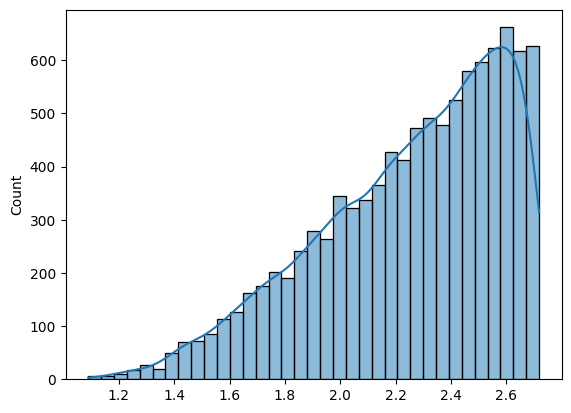

In [34]:
import seaborn as sns

sns.histplot(my_distribution.rvs(size=10000), kde=True)

In [37]:
def generating_method(size):
    x = np.random.uniform(0, 1, size)
    return np.exp(np.float_power(x, 1 / 4))


measure_time(generating_method, 10)
measure_time(generating_method, 100)
measure_time(generating_method, 1000)
measure_time(generating_method, 10000)
measure_time(generating_method, 100000)

Measuring n=10
2.6 µs ± 14.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Measuring n=100
4.07 µs ± 8.06 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Measuring n=1000
19.3 µs ± 70.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Measuring n=10000
168 µs ± 335 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

Measuring n=100000
1.71 ms ± 9.46 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



<Axes: ylabel='Count'>

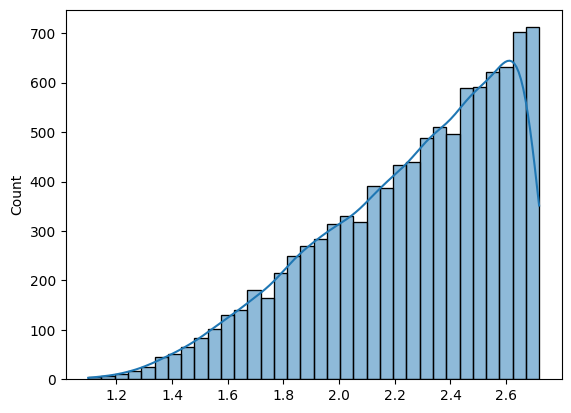

In [38]:
import seaborn as sns

sns.histplot(generating_method(10000), kde=True)

In [39]:
def p(x):
    return 4 * np.power(np.log(x), 3) / x


def q(x):
    return 1 / (np.e - 1)


def rejected_sampling(size):
    xs = np.random.uniform(low=1, high=np.e, size=size)
    cs = np.random.uniform(0, 1, size=size)
    ps = p(xs)
    qs = q(xs)
    k = max(ps / qs)
    mask = ps / (k * qs) > cs
    return xs[mask]


measure_time(rejected_sampling, 10)
measure_time(rejected_sampling, 100)
measure_time(rejected_sampling, 1000)
measure_time(rejected_sampling, 10000)
measure_time(rejected_sampling, 100000)

Measuring n=10
9.5 µs ± 30 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Measuring n=100
15.3 µs ± 48.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Measuring n=1000
73.9 µs ± 261 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

Measuring n=10000
653 µs ± 2.73 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Measuring n=100000
6.63 ms ± 31.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



<Axes: ylabel='Count'>

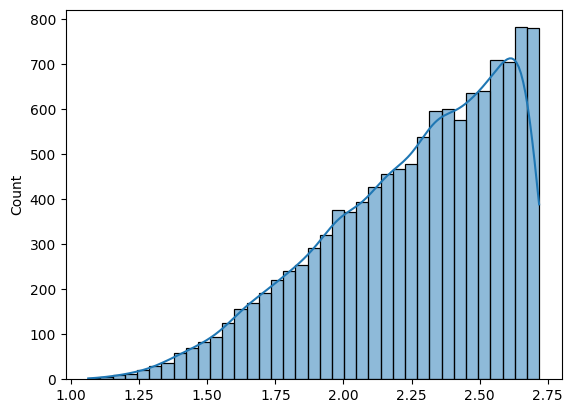

In [40]:
sns.histplot(rejected_sampling(30000), kde=True)

## Задача 4.

Пусть $X_1, ..., X_n$ – i.i.d. величины из некоторого распределения, которое параметризуется параметром $\theta \in E$. Пусть $\overline{X_n} = \frac{X_1 + ... + X_n}{n}$, $\mu_\theta$ --- математическое ожидание случайной величины $X_i$. Найти с помощью неравенства Чебышёва и центральной предельной теоремы номер $n$, при котором равномерно для $\theta \in E$ и заданных $\delta, \varepsilon \in (0, 1)$ выполняется соотношение: $$ P(|\overline{X_n} - \mu_\theta| \le \varepsilon) \ge 1 - \delta $$

Для найденного по неравенству Чебышёва $n$ сгенерировать 100 выборок найденного объёма $n$ и посчитать количество и долю выборок, для которых $|\overline{X_n} - \mu_n| \le \varepsilon$. Параметры эксперимента: $\varepsilon = 0.01, \delta = 0.05$ и $\theta$, при котором найдена равномерная оценка. То же самое сделать и для $n$, найденного с помощью ЦПТ.

Класс распределения $Exp(\lambda), \lambda \in [1, 5]$.

**Решение:**
Заметим, что $\overline{X_n} \sim \Gamma(n, \frac{1}{n\lambda})$.

Найдём через неравенство Чебышёва:
$$ P(|\overline{X_n} - M(X_n)| \le \varepsilon) \ge 1 - \frac{1}{\varepsilon} $$

$$P(|\overline{X_n} - n \cdot \frac{1}{n\lambda}| \le \varepsilon) \ge 1 - \frac{n \cdot (\frac{1}{n\lambda})^2}{\varepsilon^2}  $$

$$ P(|\overline{X_n} - \frac{1}{\lambda}| \le \varepsilon) \ge 1 - \frac{1}{n\lambda^2\varepsilon^2} $$

Заметим, что $\mu_\theta = \frac{1}{\lambda}$, а значит, что в нашей задаче должно выполнятся неравенство $\frac{1}{n\lambda^2\varepsilon^2} \ge \delta$. Откуда получаем, что $n \ge \frac{1}{\delta\lambda^2\varepsilon^2}$

Найдём через ЦПТ:

$$ 1 - \delta \le P(-\varepsilon \le \overline{X_n} - \mu_\theta \le \varepsilon) = 2\Phi(\varepsilon \sqrt{n} \lambda) $$
$$ 1 - \delta \le 2\Phi(\varepsilon \sqrt{n} \lambda)$$

Подставляя $\delta = 0.05$, получаем: $$\varepsilon \sqrt{n} \lambda \ge 1.96$$
$$n \ge (\frac{1.96}{\varepsilon\lambda})^2$$


**Симуляция:** результаты симуляции показали, что оценка ЦПТ оказалась более точной, нежели оценка неравенства Чебышёва и что в данном случае $n=38416$ достаточно для получения требуемой погрешности.

In [2]:
from numpy.random import exponential
from numpy import abs, ceil

theta = 1
experiments = 100
eps = 0.01
delta = 0.05
lmbda = 1

def experiment(n):
    answer = 0
    for i in range(experiments):
        sample = exponential(1 / theta, n).mean()
        if abs(sample - 1 / theta) <= eps:
            answer += 1

    return answer / experiments

In [5]:
n = int(ceil(1/(delta * (lmbda ** 2) * (eps ** 2))))
print(f"Результат, полученный из неравенства Чебышёва: {experiment(n):.2f} (n={n})")

Результат, полученный из неравенства Чебышёва: 1.00 (n=200000)


In [6]:
n = int(ceil((1.96/(lmbda * eps))**2))
print(f"Результат, полученный из ЦПТ: {experiment(n):.2f} (n={n})")

Результат, полученный из ЦПТ: 0.95 (n=38416)
